<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/MeiaVida_Tecnesio99m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrutura da Matéria III

Modalidade: Experimental

Aluna: Úrsula Goulart

Professor: Dr. Wagner de Paula

---

##Experimento 1 - Meia-vida do Nuclídeo

### Objetivo

Calcular $\lambda$, através de 

$$\boxed{N_t = N_0 \ e^{\lambda t}}$$

Para, posteriormente, calcular a meia-vida do nuclídeo em questão

$$\boxed{\tau = \frac{1}{\lambda} }$$

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##Eventos de Fundo

Calcular o valor estimado e o erro das contagens dos sinais de fundo.

In [166]:
data_bk = pd.read_csv('Fundo.csv')

media_bk = data_bk['contagem'].mean()

desvpad = np.std(data_bk['contagem'], ddof = 1)

print(media_bk,'+-', desvpad)

3482.3555555555554 +- 57.10204404698167


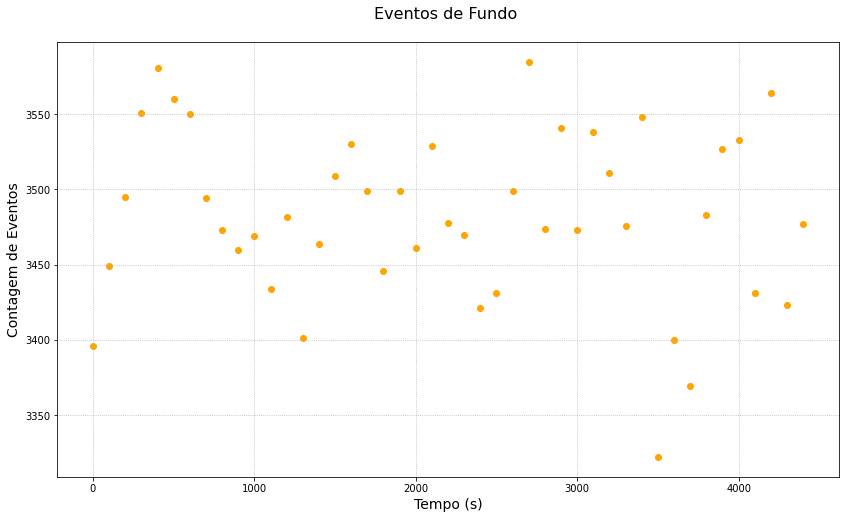

In [167]:
fig = plt.subplots(figsize=(14,8))

plt.scatter(data_bk['tempo'], data_bk['contagem'], c='orange')
plt.title('Eventos de Fundo \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

##Eventos de sinal

### Construção da tabela de dados

1. Corrigir o número de contagens, subtraindo pela média de contagens do fundo e em seguida dividir pelo número de contagens do tempo inicial

2. Corrigir o tempo, para que se inicie em $t = 0$



In [179]:
data = pd.read_csv('Ursula.csv')

#data['Diferenca'] = data['contagem'].diff()
#data.fillna(0, inplace=True)

t0 = 170100
contcor0 = 60153.644444
data['TempoCorrigido'] = data['tempo'] -t0
data['ContagemCorrigida'] = (data['contagem'] - media_bk)/contcor0
data['LogTaxaMedia'] = np.log(data['ContagemCorrigida'])

data.head()

,tempo,contagem,TempoCorrigido,ContagemCorrigida,LogTaxaMedia
0,170100,63636,0,1.000000,7.388534e-12
1,170400,63373,300,0.995628,-4.381723e-03
2,170700,62512,600,0.981315,-1.886226e-02
3,171000,61829,900,0.969960,-3.050018e-02
4,171300,61000,1200,0.956179,-4.481027e-02


###Verificar se os dados seguem a lei de decaimento exponencial



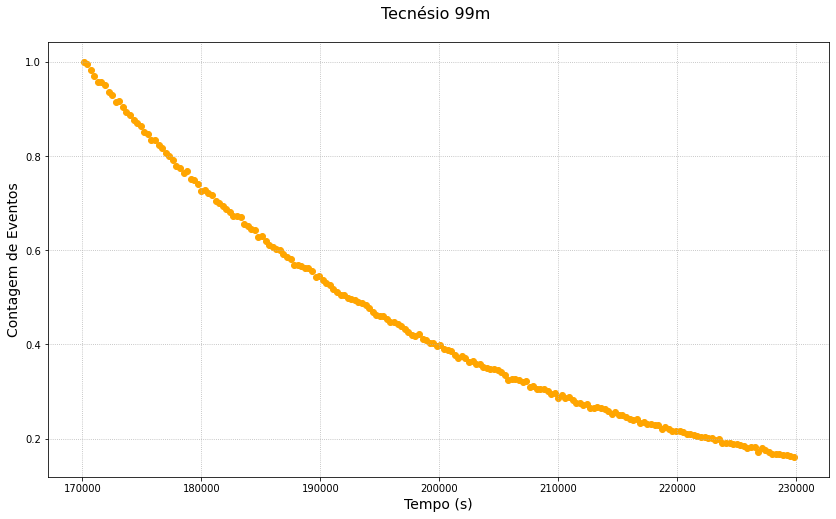

In [169]:
fig = plt.subplots(figsize=(14,8))

plt.scatter(data['tempo'], data['ContagemCorrigida'], c='orange')
plt.title('Tecnésio 99m \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

###Ajuste linear/ Não-linear

O $\lambda$ pode ser calculado usando dois tipos de ajuste


- Ajuste linear : Para o caso de usarmos o logaritmo dos dados da contagem corrigida.

- Ajuste não-linear (ajuste exponencial) : Para o caso de usarmos os dados da contagem corrigida

  - Talvez sirva para provar que obedece a lei do decaimento exponencial

####Ajuste Não-Linear

In [170]:
def ajuste(x, a, lamb):
  return a * np.exp(lamb * data['TempoCorrigido'])

popt_tc, pcov_tc = curve_fit(ajuste, data['TempoCorrigido'], data['ContagemCorrigida'], p0 = (1, -0.0001))

In [171]:
popt_tc

array([ 9.96744258e-01, -3.07883883e-05])

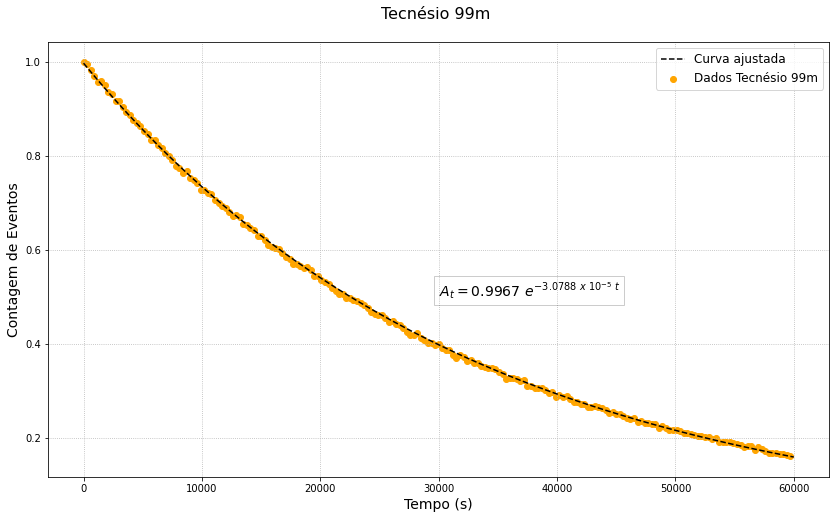

In [172]:
fig, ax = plt.subplots(1, figsize=(14,8))

x_tc = np.linspace(0, 60000, num=200)
plt.plot(x_tc, ajuste(x_tc, *popt_tc), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data['TempoCorrigido'], data['ContagemCorrigida'], c='orange', label='Dados Tecnésio 99m')
plt.title('Tecnésio 99m \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(30000.0, 0.5, '$A_t = 0.9967 \ e^{-3.0788 \ x \ 10^{-5} \ t}$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

####Ajuste Linear

É  possível reescrever

$$\boxed{N_t = N_0 \ e^{\lambda t}}$$

Como

$$\boxed{ln(\frac{N}{N_0}) = - \lambda t}$$

Se assemelha a equação de uma reta $\ y = ax + b \ $ , onde 

$y = ln(\frac{N}{N_0})$ 

$x = t$

$a = \lambda$

In [173]:
x = data['TempoCorrigido']
y = data['LogTaxaMedia']

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

y = (-3.052766911519548e-05 +- 3.774632721602802e-08)x +( -0.008902117465373616 +- 0.0013026667136197686)


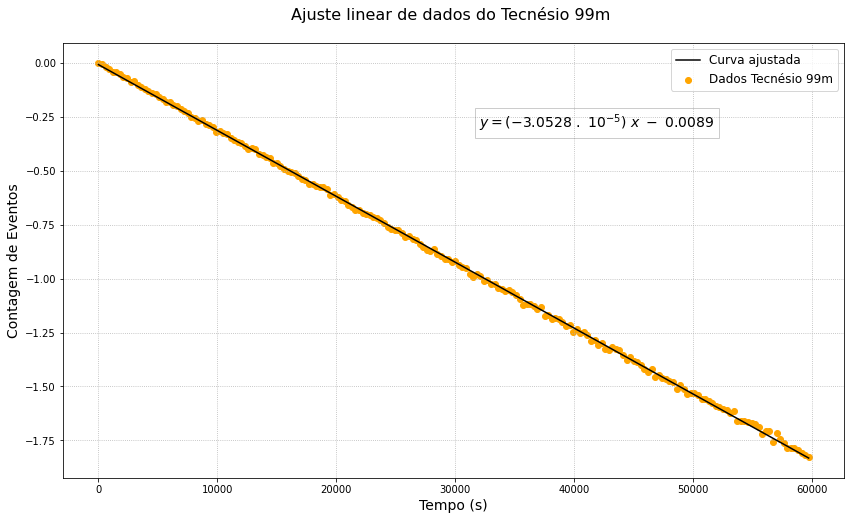

In [181]:
fig, ax = plt.subplots(1, figsize=(14,8))

plt.plot(data['TempoCorrigido'], parametros[0]*data['TempoCorrigido']+parametros[2], c='black', label='Curva ajustada')
plt.scatter(data['TempoCorrigido'], data['LogTaxaMedia'], c='orange', label='Dados Tecnésio 99m')
plt.title('Ajuste linear de dados do Tecnésio 99m \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(32000.0, -0.3, '$y = (-3.0528 \ . \ 10^{-5}) \ x \ - \ 0.0089$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

###Meia Vida


In [175]:
tau = abs(1/(parametros[0]))
erro_tau = (parametros[1]/parametros[0]) * tau

meiavida = abs(np.log(2) * tau)
erro_meiavida = np.sqrt(np.power(np.log(2), 2) * np.power(erro_tau, 2))

print(tau, '+-', erro_tau,'\n', meiavida, '+-', erro_meiavida)


32757.168463354414 +- -40.50302022151002 
 22705.53896350127 +- 28.07455427070212


###Compatiblidade

[Valor de referência do Tecnésio 99m](https://ehs.stanford.edu/reference/tc-99m-radionuclide-fact-sheet) : 6.02h

 $$|t_{ref} - t_{1/2}| \leq 2  \sigma$$

In [177]:
meiavida_ref = 21672.0

comp = abs(meiavida - meiavida_ref)
def compatibilidade():
  if comp <= 2*erro_meiavida:
    print('Compatível: ', comp, '<= 2 sigma')
  if 2*erro_meiavida < comp < 3*erro_meiavida:
    print('Inconclusivo: ', '2 sigma <', comp, '< 3 sigma')
  if comp > 3*erro_meiavida:
    print('Incompatível: ', comp, '> 3 sigma')

compatibilidade()


Incompatível:  1033.5389635012689 > 3 sigma


###Erro relativo

Cálculo da precisão de um resultado, dado por

$$\epsilon = \frac{|t_{ref} - t_{1/2}|}{t_{ref}}$$


In [182]:
print(abs(21672.0 - 22705.5390)/21672.0)

0.0476900609080842
